In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# for local installation
# sys.path.append("../") # go to parent dir if running notebook directly in sub-folder

# for Google Colab
!git clone http://github.com/tjbarnum13/Fourier-DVR-1D.git
sys.path.insert(0,'/content/Fourier-DVR-1D')
from fourier_DVR_1D import Domain_Fourier_DVR_1D

Cloning into 'Fourier-DVR-1D'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 99 (delta 1), reused 4 (delta 1), pack-reused 93
Unpacking objects: 100% (99/99), done.


In [254]:
# settings
m = 0.1 # particle mass
x_min = 0.0
x_max = 50.0
n_DVR = 300 # number of DVR grid points
n_g = 1001 # number of grid points for plotting
n_plot = 5 # number of eigenstates to plot
scale = 1.0 # used to adjust size of wavefunctions on plot

In [255]:
# potential energy curve parameters
De1 = 10.0 # dissociation energy 1
De2 = 10.0 # dissociation energy 2
k1 = 1.0 # effective force constant at bottom of well 1
a1 = np.sqrt(k1/(2*De1)) # width 1
k2 = 1.0 # effective force constant at bottom of well 2
a2 = np.sqrt(k2/(2*De2)) # width 2
xe1 = 10.0 # equilibrium bond distance 1
xe2 = 15.0 # equilibrium bond distance 2
V1 = lambda x: De1 * (1 - np.exp(-a1 * (x - xe1)))**2 # potential energy curve 1
V2 = lambda x: De2 * (1 - np.exp(-a2 * (x - xe2)))**2 # potential energy curve 2

In [256]:
# solve
domain = Domain_Fourier_DVR_1D(x_min, x_max, n_DVR)
E1, E_four1 = domain.solve(m, V1)
E2, E_four2 = domain.solve(m, V2) 

# evaluate eigenstates on grid
x = np.linspace(x_min, x_max, n_g)
psi_x1 = domain.grid(x, E_four1[:,:n_plot])
psi_x2 = domain.grid(x, E_four2[:,:n_plot])

In [257]:
# normalize all wavefunctions
def normalize(psi, x):
  N = scipy.integrate.trapz((psi)**2,x)
  return (1/N) * psi

for i in range(n_plot):
  psi_x1[i]=normalize(psi_x1[i],x)
  psi_x2[i]=normalize(psi_x2[i],x)

In [264]:
FCF = np.zeros((n_plot,n_plot))

for j in range(n_plot):
  for i in range(n_plot):
    FCF[i,j] = abs(scipy.integrate.trapz(psi_x1[i] * psi_x2[j], x))**2

print(FCF.sum(axis=1)) # check that FCFs sum to 1, if less than 1 there is significant overlap with a vibrational state not included

[0.13607622 0.56910931 0.60869279 0.75469291 0.85252802]


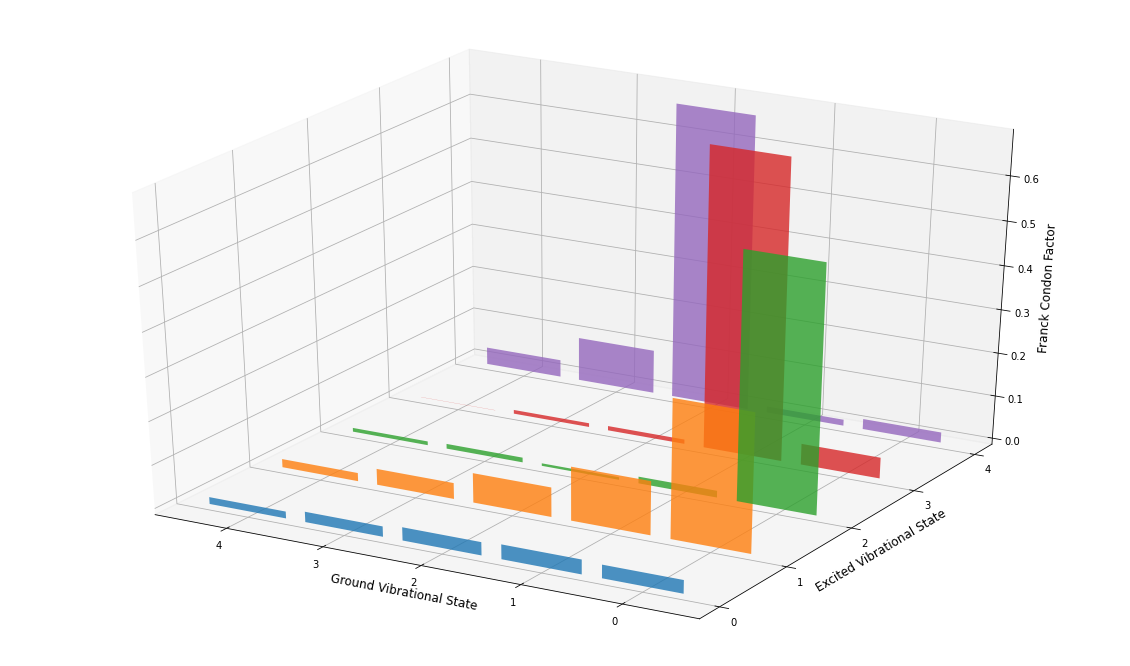

In [260]:
# plot FCFs

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(projection='3d')

ticks = (range(n_plot))

for k in ticks:
  ax.bar(ticks, FCF[k,:], k, zdir='y',alpha=0.8)

    # Plot the bar graph given by yticks and FCF on the plane y=i with 80% opacity.

ax.set_xlabel('Ground Vibrational State',fontsize=12)
ax.set_ylabel('Excited Vibrational State',fontsize=12)
ax.set_zlabel('Franck Condon Factor',fontsize=12)

# On the y axis only label the discrete values that we have data for.
ax.set_yticks(ticks)

ax.invert_xaxis()

plt.show()